<a href="https://colab.research.google.com/github/Rajashekar-Anumalla/PlayStoreAppReview_DataWrangling/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing libraries

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Loading file into colab and analysing dataframe

In [45]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/New/PlayStoreAppReview/Copy of Play Store Data.csv')

df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [46]:
df.tail(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [47]:
df.shape # shape of dataframe

(10841, 13)

In [48]:
df_copy = df.copy() #copying complete dataset


In [49]:
df_copy.describe() # To know Central limit of columns contatining numeric values

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [50]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [51]:
df_copy.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#Cleaning DATA/ DATA Wrangling

## Dealing with Outliers
#### in the above code block we found Rating column has more number of missing values to be handle 

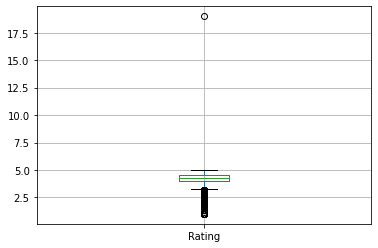

In [52]:
df_copy.boxplot() #to see whether are there any outlier

In [53]:
df_copy[df_copy['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [54]:
#to know the length of App of index 10472
len(df['App'][10472])

39

In [55]:
# I found in record 10472 all the field values are shifted towards left
# so i made a try to set them and if i am unsuccessful will drop the record


col = list(df.columns)
print(col)

idx = df_copy.index[df['Rating'] > 5].tolist()[0]
df_copy.loc[idx,'Rating'] = float(df.loc[idx, col[1]])
df_copy.loc[idx, col[0]] = df.loc[idx, col[0]][0:16]
df_copy.loc[idx, col[1]] = df.loc[idx, col[0]][16:40]

for j in range(2,len(col)-1):
  df_copy.loc[idx, col[j+1]] = df.loc[idx, col[j]]
  
df_copy[idx:idx+1]

# df_copy[col[0]][df_copy.index[df_copy['Rating'] > 5].tolist()[0]][0:16]
# the above code in statement,
# I had took concept help from google to get the index of particular record


['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi,Touchscreen Photo Frame,1.9,19,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


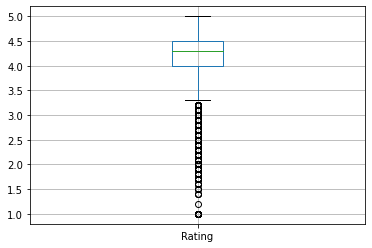

In [56]:
# let's again check whether are there any outliers

df_copy.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed2a9ee790>]],
      dtype=object)

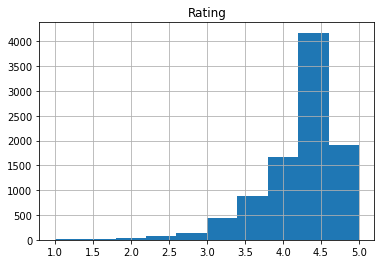

In [57]:
df_copy.hist() # its seems to be like skewed right side

## Filling/ Imputating of missing data
#### now it looks ratings columns has no null values 
####lets work on type, Genres , current ver and Andriod Ver field

In [58]:
df_copy.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [59]:
# creating function to update series of rating
def imputate_rating(ser):
  return ser.fillna(ser.median())

In [60]:
# updating series rating which are null values
df_copy['Rating'] = df_copy['Rating'].transform(imputate_rating)

In [61]:
df_copy.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            1
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [62]:
## observing data we feel that Category value is same as Genres so, as there is 
## only record is to be updated we are filling it with category data
df_copy['Genres'].fillna(df_copy.loc[idx,'Category'],inplace= True)
df_copy.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [63]:
## As all the above missing values are Qualitative data , we have decided to 
## fill them will most repitative value in that series nothing but mode of 
##that series
df_copy['Type'].fillna(df_copy['Type'].mode().values[0], inplace = True)
df_copy['Current Ver'].fillna(df_copy['Current Ver'].mode().values[0], inplace = True)
df_copy['Android Ver'].fillna(df_copy['Android Ver'].mode().values[0], inplace = True)

df_copy.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

##DATA formatting
#### Now till here we have handled the dataset with missing values
#### However now we need to look at the format of the data like for installs, price and review field should be in numerics

In [64]:
df_copy['Price'] = df_copy['Price'].apply(lambda x : float(str(x).replace('$','')) if '$' in str(x) else float(str(x)))
df_copy['Installs'] = df_copy['Installs'].apply(lambda x : str(x).replace('+','') if '+' in str(x) else str(x))
df_copy['Installs'] = df_copy['Installs'].apply(lambda x : float(str(x).replace(',','')) if ',' in str(x) else float(str(x)))
df_copy['Reviews'] = df_copy['Reviews'].astype(float)
df_copy['Reviews']

## Here we have updated the format of required fields

0           159.0
1           967.0
2         87510.0
3        215644.0
4           967.0
           ...   
10836        38.0
10837         4.0
10838         3.0
10839       114.0
10840    398307.0
Name: Reviews, Length: 10841, dtype: float64

#Hypothesis

#### 1. Categories group vs Rating

In [65]:
df_1 = df_copy.groupby('Category',as_index=False)['Rating'].mean()

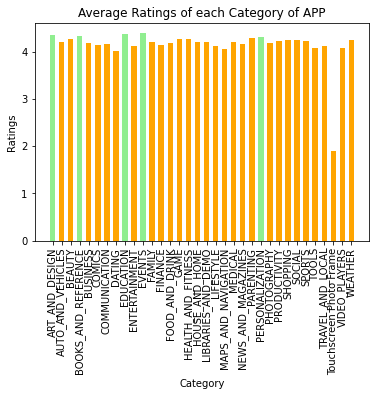

In [66]:
colors = ['lightgreen' if x > 4.3 else 'orange' for x in df_1.Rating]

plt.bar(df_1.Category,df_1.Rating,width=0.6,color=colors)

plt.xlabel('Category')
plt.ylabel('Ratings')
plt.title('Average Ratings of each Category of APP')

plt.xticks(rotation=90)
plt.show()

In [67]:
df_1['Category'].max()
df_2 = df_copy[df_copy['Category'] == df_1['Category'].max()]
df_3 = df_2.sort_values(['Rating'],ascending =False).head(10)
df_3
# df_11 = df_3.sort_values(['Rating'],ascending =False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3627,Weather forecast,WEATHER,4.8,159455.0,10M,1000000.0,Free,0.00,Everyone,Weather,"May 8, 2018",1.11.93,4.4 and up
3629,Live Weather Pro,WEATHER,4.8,892.0,17M,10000.0,Free,0.00,Everyone,Weather,"July 17, 2018",1.1,4.4 and up
3658,Weather Live Pro,WEATHER,4.8,17493.0,11M,100000.0,Paid,4.49,Everyone,Weather,"April 20, 2018",1.3,4.4 and up
3631,weather - weather forecast,WEATHER,4.7,11118.0,9.7M,1000000.0,Free,0.00,Everyone,Weather,"April 26, 2018",30,4.0 and up
8912,Weather Forecast Pro,WEATHER,4.7,14051.0,8.7M,100000.0,Paid,3.99,Everyone,Weather,"August 4, 2018",8.5,4.0 and up
7491,Fu*** Weather (Funny Weather),WEATHER,4.7,20001.0,Varies with device,1000000.0,Free,0.00,Mature 17+,Weather,"July 26, 2018",Varies with device,Varies with device
8153,WebCams,WEATHER,4.6,3963.0,23M,100000.0,Free,0.00,Everyone,Weather,"July 17, 2018",5.2.11,4.2 and up
3638,Klara weather,WEATHER,4.6,36900.0,4.8M,500000.0,Free,0.00,Everyone,Weather,"July 28, 2018",1.3.6,4.0 and up
3653,Storm Radar: Tornado Tracker & Hurricane Alerts,WEATHER,4.6,89868.0,Varies with device,1000000.0,Free,0.00,Everyone,Weather,"June 12, 2018",Varies with device,Varies with device
3643,Live Weather & Daily Local Weather Forecast,WEATHER,4.5,13426.0,19M,1000000.0,Free,0.00,Everyone,Weather,"July 17, 2018",9.9.1.1910,4.1 and up


####2.Categoeries group vs Install

In [68]:
df_4 = df_copy.groupby('Category',as_index=False)['Installs'].median()
df_4

,Category,Installs
0,ART_AND_DESIGN,100000.0
1,AUTO_AND_VEHICLES,100000.0
2,BEAUTY,50000.0
3,BOOKS_AND_REFERENCE,10000.0
4,BUSINESS,1000.0
5,COMICS,100000.0
6,COMMUNICATION,1000000.0
7,DATING,100000.0
8,EDUCATION,1000000.0
9,ENTERTAINMENT,5000000.0


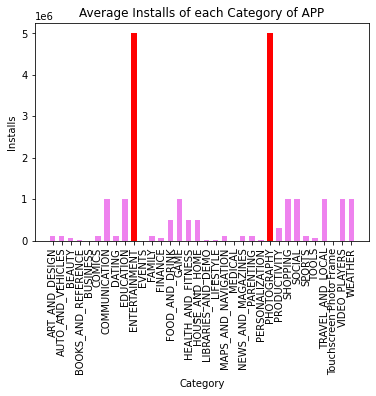

In [69]:
colors = ['red' if x > 1000000 else 'violet' for x in df_4.Installs]

plt.bar(df_4.Category,df_4.Installs,width=0.6,color=colors)

plt.xlabel('Category')
plt.ylabel('Installs')
plt.title('Average Installs of each Category of APP')

plt.xticks(rotation=90)
plt.show()


In [70]:
df_5 = df_copy[df_copy['Category'] == 'ENTERTAINMENT']
df_6 = df_5.sort_values(['Rating'],ascending =False).head(10)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0, flags=flags)


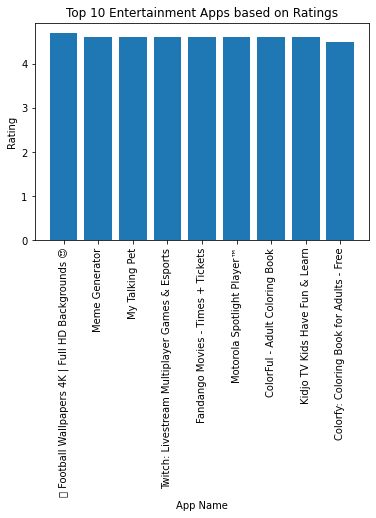

In [75]:
plt.bar(df_6['App'],df_6['Rating'])

plt.xlabel('App Name')
plt.ylabel('Rating')
plt.title('Top 10 Entertainment Apps based on Ratings')

plt.xticks(rotation=90)
plt.show()

# sns.scatterplot(x=df_6['App'], y=df_6['Rating'])

# plt.xticks(rotation=90)


####4.Top rating APP in each Category

In [72]:
list_cate = [x for x in df_1['Category']]
list_cate[0]

print(len(list_cate))
# top_rated_App = []

# for i in list_cate:
#   p = df_copy[df_copy['Category'] == df_copy[i]]
#   ap = 
#   top_rated_App.append(ap)

# # top_App_list = [df_copy[df_copy[x]]['App'] for x in list_cate]

# print(top_App_list)

p = df_copy[df_copy['Category']==list_cate[0]]
p.sort_values(['Price'],ascending = False)


# df_copy[df_copy['Rating']== p]

34


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4755,"X Launcher Pro: PhoneX Theme, OS11 Control Center",ART_AND_DESIGN,4.7,801.0,3.5M,5000.0,Paid,1.99,Everyone,Art & Design,"July 30, 2018",2.1.2,4.1 and up
4759,X Launcher Pro - IOS Style Theme & Control Center,ART_AND_DESIGN,4.8,1216.0,8.6M,10000.0,Paid,1.99,Everyone,Art & Design,"June 26, 2018",1.0.0,4.1 and up
4764,X Launcher Prime: With OS Style Theme & No Ads,ART_AND_DESIGN,4.7,149.0,3.5M,1000.0,Paid,1.99,Everyone,Art & Design,"July 30, 2018",1.2.2,4.1 and up
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.00,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221.0,Varies with device,10000000.0,Free,0.00,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,Animated Photo Editor,ART_AND_DESIGN,4.1,203.0,6.1M,100000.0,Free,0.00,Everyone,Art & Design,"March 21, 2018",1.03,4.0.3 and up
28,Pencil Sketch Drawing,ART_AND_DESIGN,3.9,136.0,4.6M,10000.0,Free,0.00,Everyone,Art & Design,"July 12, 2018",6.0,2.3 and up
29,Easy Realistic Drawing Tutorial,ART_AND_DESIGN,4.1,223.0,4.2M,100000.0,Free,0.00,Everyone,Art & Design,"August 22, 2017",1.0,2.3 and up
30,Pink Silver Bow Keyboard Theme,ART_AND_DESIGN,4.2,1120.0,9.2M,100000.0,Free,0.00,Everyone,Art & Design,"July 12, 2018",6.7.12.2018,4.0.3 and up


In [73]:
df_copy.to_csv('/content/drive/MyDrive/Colab Notebooks/DataFrame.csv')